In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("adult-income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Examining the columns and their types.

In [4]:
df["age"]

0        25
1        38
2        28
3        44
4        18
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 48842, dtype: int64

In [5]:
df["occupation"]

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object

In [6]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [7]:
df["hours-per-week"]

0        40
1        50
2        40
3        40
4        30
         ..
48837    38
48838    40
48839    40
48840    20
48841    40
Name: hours-per-week, Length: 48842, dtype: int64

In [8]:
df["education"]

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [9]:
df["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [10]:
df["educational-num"]

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: educational-num, Length: 48842, dtype: int64

In [11]:
df["income"]

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [12]:
df["income"] = df["income"].apply(lambda x: 1 if x == "<=50K" else 0)

In [13]:
df["income"]

0        1
1        1
2        0
3        0
4        1
        ..
48837    1
48838    0
48839    1
48840    1
48841    0
Name: income, Length: 48842, dtype: int64

### Splitting the whole data into train and test data.

In [14]:
train, test = train_test_split(df, test_size=0.2)

In [15]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2772,41,Self-emp-not-inc,171003,7th-8th,4,Never-married,Other-service,Unmarried,White,Female,0,0,30,United-States,1
12386,41,Private,56651,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
46891,51,Self-emp-not-inc,24790,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,0
47964,18,Private,240543,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,1
27542,78,?,83511,7th-8th,4,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482,21,State-gov,254620,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,16,United-States,1
34704,43,Private,90582,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,1
43264,36,Self-emp-not-inc,138940,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,50,United-States,0
34119,23,Private,393248,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,1


In [16]:
test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11224,66,?,128609,HS-grad,9,Divorced,?,Not-in-family,Black,Male,0,0,40,United-States,0
40741,19,State-gov,194260,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,1
42972,51,Private,206775,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,United-States,1
3842,49,Self-emp-inc,182211,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0
31042,39,Private,286026,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,38,Private,208109,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,50,United-States,1
27708,24,Private,291355,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,60,United-States,1
13676,24,Private,111376,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
5512,27,Private,257033,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,60,United-States,1


## Performing firstly a linear regression.

In [17]:
y_train = train['income']
X_train = train[['educational-num', 'age', 'hours-per-week']]

In [18]:
X_train = sm.add_constant(X_train)

In [19]:
model = sm.OLS(y_train, X_train, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     3006.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:46:01   Log-Likelihood:                -18048.
No. Observations:               39073   AIC:                         3.610e+04
Df Residuals:                   39069   BIC:                         3.614e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7548      0.011    164.221      0.000       1.734       1.776
educational-num    -0.0501      0.001    -65.653      0.000      -0.052      -0.049
age                -0.0065      0.000    -46.053      0.000      -0.007      -0.006
hours-per-week     -0.0058      0.000    -36.655      0.000      -0.006      -0.006
==============================================================================
Omnibus:                     4128.091   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5020.370
Skew:                          -0.850   Prob(JB):                         0.00
Kurtosis:                       2.560   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

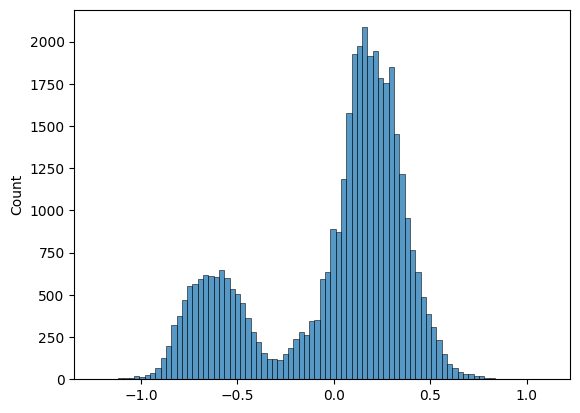

In [20]:
sns.histplot(model_result.resid)

In [21]:
mu, std = stats.norm.fit(model_result.resid)
mu, std

(np.float64(2.2489396803790748e-15), np.float64(0.384034737548245))

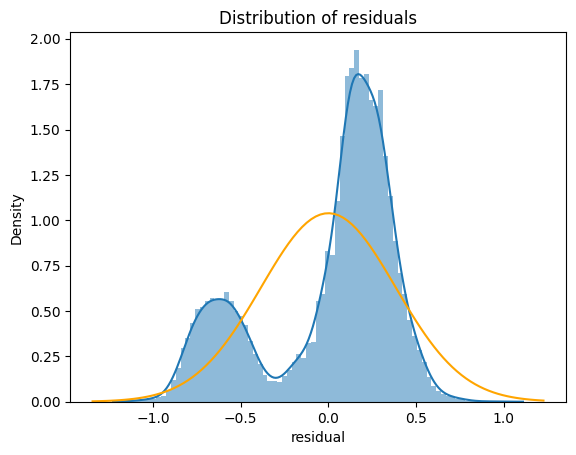

In [22]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

### Applying the model to test data.

In [23]:
X_test = test[['educational-num', 'age', 'hours-per-week']]

In [24]:
X_test = sm.add_constant(X_test)

In [25]:
y_test = test['income']

In [26]:
y_pred = model_result.predict(X_test)

In [27]:
y_pred

11224    0.640131
40741    1.042683
42972    0.629958
3842     0.693104
31042    0.616340
           ...   
5853     0.564722
27708    0.748300
13676    0.914683
5512     0.778762
40214    0.507302
Length: 9769, dtype: float64

In [28]:
pd.concat([y_test, y_pred], axis=1)

,income,0
11224,0,0.640131
40741,1,1.042683
42972,1,0.629958
3842,0,0.693104
31042,0,0.616340
...,...,...
5853,1,0.564722
27708,1,0.748300
13676,1,0.914683
5512,1,0.778762


### The performance.

In [29]:
abs(y_test - y_pred).mean()

np.float64(0.31443567729141275)

### 0.314

In [30]:
model_result.get_prediction(X_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
11224,0.640131,0.004426,0.631455,0.648807,-0.112675,1.392937
40741,1.042683,0.005131,1.032625,1.052740,0.289859,1.795506
42972,0.629958,0.002964,0.624148,0.635768,-0.122820,1.382737
3842,0.693104,0.002996,0.687232,0.698976,-0.059675,1.445883
31042,0.616340,0.002963,0.610532,0.622148,-0.136438,1.369119
...,...,...,...,...,...,...
5853,0.564722,0.003179,0.558492,0.570952,-0.188060,1.317504
27708,0.748300,0.004320,0.739833,0.756768,-0.004503,1.501104
13676,0.914683,0.002954,0.908893,0.920472,0.161904,1.667461
5512,0.778762,0.004266,0.770401,0.787122,0.025959,1.531564


## Secondly, we will try decision trees.

In [31]:
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    y_pred_proba = clf.predict_proba
    print(i, abs(y_test - y_pred).mean())

1 0.24311597911761695
2 0.2148633432285802
3 0.21209949841334835
4 0.20923328897533014
5 0.2052410686866619
6 0.20554816255502098
7 0.2046268809499437
8 0.2046268809499437
9 0.2063670795373119
10 0.206674173405671
11 0.21199713379056198
12 0.21578462483365748
13 0.2183437404033166
14 0.2228477838059167
15 0.2230525130514894
16 0.22540689937557581
17 0.22878493192752586
18 0.22878493192752586
19 0.23032040126932132


### The performance.

### Note.
Decision trees perform somewhat better. Additionally, the optimum maximum depth is 5. From there and onwards, the model starts to overfit.

### 0.194

In [32]:
clf = tree.DecisionTreeClassifier(max_depth=5)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba

### The performance.

In [33]:
abs(y_test - y_pred).mean()

np.float64(0.2052410686866619)

In [34]:
print('Depth of the Decision Tree :', clf.get_depth())

Depth of the Decision Tree : 5


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.36      0.46      2375
           1       0.82      0.93      0.87      7394

    accuracy                           0.79      9769
   macro avg       0.73      0.65      0.67      9769
weighted avg       0.78      0.79      0.77      9769



## And lastly, we will be interested in random forests.

In [36]:
clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Number of Trees used : ', clf.n_estimators)

Number of Trees used :  100


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44      2375
           1       0.82      0.91      0.86      7394

    accuracy                           0.78      9769
   macro avg       0.69      0.64      0.65      9769
weighted avg       0.76      0.78      0.76      9769



### The performance.

In [38]:
abs(y_test - y_pred).mean()

np.float64(0.22264305456034394)

### 0.213

We covered the application of three models. Now, we will be interested in cross validation.

## Cross-validation

First, let's appropriately redefine $X$ and $y$. We will no longer split the dataset intro train and test subsets manually. This will be done by the  `cross_val_score` function automatically. In fact, it will be done repeatedly, to get various partitions.

In [39]:
y = df['income']
X = df[['educational-num', 'age', 'hours-per-week']]
X = sm.add_constant(X)

In [62]:
reg = LinearRegression()

In [63]:
scores = cross_validate(reg, X, y, cv=10)

In [64]:
print(scores)
print(scores["test_score"].max())

{'fit_time': array([0.0057528 , 0.0080359 , 0.01047873, 0.01068473, 0.00474   ,
       0.0105989 , 0.01045465, 0.0042572 , 0.00688601, 0.00399899]), 'score_time': array([0.00323701, 0.00180626, 0.00311065, 0.00629878, 0.00385284,
       0.00141263, 0.00139785, 0.00314713, 0.00126839, 0.00260329]), 'test_score': array([0.1859876 , 0.17315936, 0.18599327, 0.18712292, 0.17623149,
       0.1770299 , 0.19740595, 0.17947111, 0.20200233, 0.20358964])}
0.20358964134930058


In [56]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [57]:
scores = cross_validate(clf, X, y, cv=10)

In [58]:
print(scores)
print(scores["test_score"].max())

{'fit_time': array([0.03243923, 0.02999663, 0.02083635, 0.02015018, 0.0203774 ,
       0.01933193, 0.01734185, 0.01769781, 0.02099586, 0.01825333]), 'score_time': array([0.0033505 , 0.00189304, 0.00574851, 0.00177455, 0.0027051 ,
       0.00166225, 0.00167036, 0.00191903, 0.00313807, 0.00165033]), 'test_score': array([0.79774821, 0.79897646, 0.78705979, 0.79873055, 0.7985258 ,
       0.79340704, 0.8026208 , 0.79995905, 0.80200655, 0.80241605])}
0.8026208026208026


In [59]:
clf = RandomForestClassifier()

In [60]:
scores = cross_validate(clf, X, y, cv=10)

In [61]:
print(scores)
print(scores["test_score"].max())

{'fit_time': array([2.05034518, 1.9101994 , 1.94931126, 1.9705236 , 1.87495399,
       1.91364288, 1.82451034, 1.83398533, 1.92820168, 1.87960768]), 'score_time': array([0.07858896, 0.07067275, 0.07084084, 0.07092476, 0.07518482,
       0.07008553, 0.07069778, 0.06952024, 0.06976867, 0.0702951 ]), 'test_score': array([0.7825998 , 0.78567042, 0.78501229, 0.78357903, 0.77927928,
       0.77968878, 0.78521704, 0.78214578, 0.79279279, 0.78726454])}
0.7927927927927928


## Analysis

We get the best performance with decision tree classifier. The classifier itself has a depth parameter which seems to give the optimal result when it's 5.